In [1]:
using Pkg
Pkg.activate("../")
Pkg.instantiate()
Pkg.status()

  Activating project at `~/github_repositories/my_repositories/FEMTISE_TUTORIAL/030_experimentation/030_test/coulomb_potential_1D_parameter_variation`


Status `~/github_repositories/my_repositories/FEMTISE_TUTORIAL/030_experimentation/030_test/coulomb_potential_1D_parameter_variation/Project.toml`
  [8bb1440f] DelimitedFiles v1.9.1
  [0bd82848] FEMTISE v1.0.0-DEV `~/github_repositories/my_repositories/FEMTISE.jl`
  [56d4f2e9] Gridap v0.17.23
  [033835bb] JLD2 v0.4.46
  [f0f68f2c] PlotlyJS v0.18.13
⌅ [91a5bcdd] Plots v1.39.0
  [295af30f] Revise v3.5.14
Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated`


In [2]:
develop_package = false
computer = "pcfamaf"

if computer == "notebook"
    kernel_dir = "mendez"
elseif computer == "pcfamaf"
    kernel_dir = "martin"
elseif computer == "ccad"
    kernel_dir = "martinmendez"
end

develop_package ? Pkg.develop(path="/home/$(kernel_dir)/github_repositories/my_repositories/FEMTISE.jl") : nothing

In [3]:
install_pkg = false
if install_pkg
    Pkg.add("Revise")
    Pkg.add("Gridap")
    Pkg.add("Plots")
    Pkg.add("JLD2")
    Pkg.add("DelimitedFiles")
    Pkg.add("PlotlyJS")
end
using Revise;
using FEMTISE;
using Gridap;
using Gridap.CellData;
using Plots;
using JLD2;
using DelimitedFiles;

In [10]:
include("./post_proccesing_result_data.jl")
include("./adhoc_potential_function.jl")

coulomb_potential_interaction_2D (generic function with 1 method)

In [5]:
path_repository="/home/$(kernel_dir)/github_repositories/my_repositories/FEMTISE_TUTORIAL/"
path_input_file="$(path_repository)030_experimentation/030_test/coulomb_potential_1D_parameter_variation/020_input/"
input_file_name="$(path_input_file)input"

"/home/martin/github_repositories/my_repositories/FEMTISE_TUTORIAL/030_experimentation/030_test/coulomb_potential_1D_parameter_variation/020_input/input"

In [27]:
simulation_info, output_data = collect_result_data(true,input_file_name)

(InputData1D{Tuple{String, String}, Params1D, FEMTISE.AnalysisParam{Float64}}("/home/martin/github_repositories/my_repositories/FEMTISE_TUTORIAL/030_experimentation/030_test/coulomb_potential_1D_parameter_variation/040_output/", "/home/martin/github_repositories/my_repositories/FEMTISE_TUTORIAL/030_experimentation/030_test/coulomb_potential_1D_parameter_variation/050_analysis/adhoc_potential_function", Params1D("1D", 100.0, "s", 0.1, 50, -0.1, "coulomb_potential_interaction_1D", (-1.0, 1.0, 0.01, 0.0)), FEMTISE.AnalysisParam{Float64}(2, 0.0, 10.0, 0.1), ("jld2", "eigen")), AnalysisParam(ComplexF64[-0.004964170065179935 - 9.56799878898402e-18im -0.01999997048681114 + 9.060868108757654e-19im … -0.09666800065823437 - 3.830477116951776e-17im -0.10216717999620017 - 3.9950651825966166e-19im; -0.0036086537745359665 + 4.565551723184481e-18im -0.01447436076881356 + 1.2713852511083992e-18im … -0.12300074545606668 - 8.839779490709997e-16im -0.07953755692597167 - 2.1986143542793002e-16im; … ; 1.16

In [84]:
fieldnames(FEMTISE.AnalysisParam)

(:λindex, :λi, :λf, :Δλ)

In [87]:
convert(Int,abs(simulation_info.analysis_param.λf-simulation_info.analysis_param.λi)/simulation_info.analysis_param.Δλ)

100

In [90]:
simulation_info.params.params_potential

(-1.0, 1.0, 0.01, 0.0)

In [46]:
function coord_1D(simulation_info)
    simulation_info.params.dom_type == "s" ? xi = -simulation_info.params.L : xi = 0.0
    num_of_points = convert(Int,simulation_info.params.L/simulation_info.params.Δx)
    simulation_info.params.dom_type == "s" ? num_of_points = 2*num_of_points : nothing
    coord = [xi + simulation_info.params.Δx*(i-1) for i in 1:num_of_points]
    return coord
end

coord_1D (generic function with 1 method)

In [91]:
function rebuild_potential_1D(simulation_info,output_data;anlysis_params=false)
    potential_function::Function=eval(Symbol(simulation_info.params.potential_function_name))
    if anlysis_params
        coord=coord_1D(simulation_info)
        potential_vector=similar(coord)
        for i in eachindex(coord)
            potential_vector[i] = potential_function(coord[i],simulation_info.params.params_potential)
        end
    else
        potential_vector=similar(output_data.r)
        for i in eachindex(output_data.r)
            potential_vector[i] = potential_function(output_data.r[i],simulation_info.params.params_potential)
        end
    end
    return potential_vector
end

rebuild_potential_1D (generic function with 2 methods)

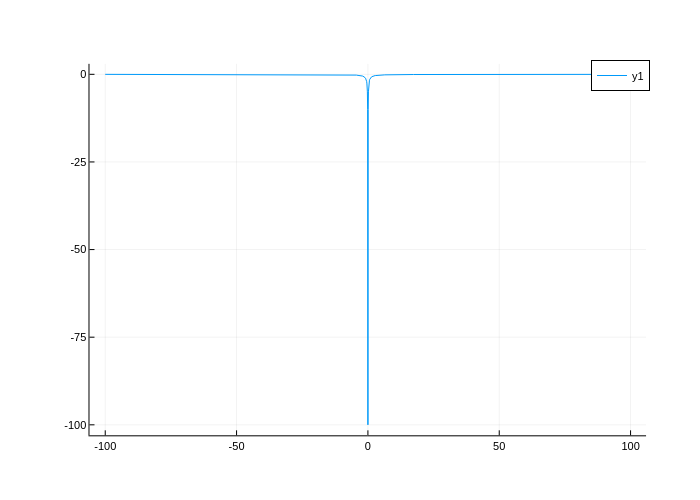

In [67]:
fig0=plot(coord_1D(simulation_info),rebuild_potential_1D(simulation_info,output_data;anlysis_params=true),legend="")
fig0=plot!(fig0,)

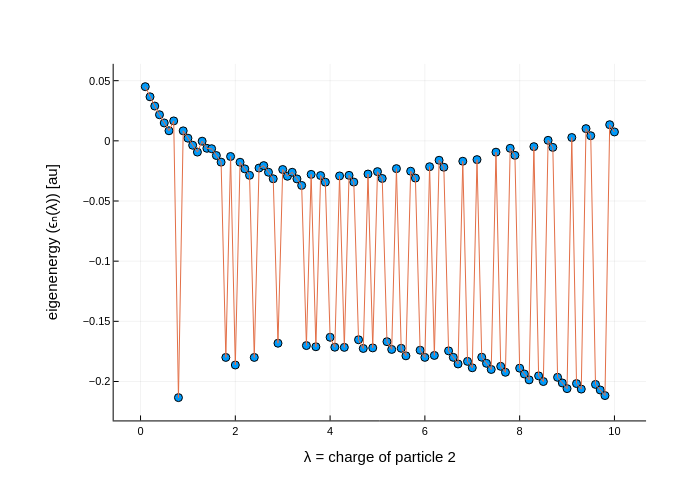

In [32]:
fig1 = plot_eigenvalues(simulation_info,output_data,10:1:10;show_label=false)
fig1 = plot!(fig1,xaxis="λ = charge of particle 2")
display(fig1)

In [19]:
save("eigenenergies.pdf",fig1)